In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import numpy.linalg as la

# Prelab

In [2]:
def findpoints(xeval, xint):
    points = []
    for i in range(len(xint)-1):
        ind = np.where(np.logical_and(xint[i] < xeval,  xeval < xint[i+1]))
        points.append(ind)
    return points

In [3]:
def makeline(x0, p1, p2):
    f = lambda x: ((p2[1] - p1[1])/(p2[0] - p1[0]))*(x-p2[0]) + p2[1]
    return f(x0)

# Lab Day

## 3.1

In [4]:
def eval_lin_spline(xeval,Neval,a,b,f,Nint):
    #’’’create the intervals for piecewise approximations’’’
    xint = np.linspace(a,b,Nint+1)
    
    #’’’create vector to store the evaluation of the linear splines’’’
    yeval = np.zeros(Neval)
    
    for jint in range(Nint):
        #’’’find indices of xeval in interval (xint(jint),xint(jint+1))’’’
        #’’’let ind denote the indices in the intervals’’’
        ind = np.where(np.logical_and(xint[jint] < xeval,  xeval < xint[jint+1]))
        
        #’’’let n denote the length of ind’’’
        n = len(ind)
        
        #’’’temporarily store your info for creating a line in the interval of interest’’’
        a1= xint[jint]
        fa1 = f(a1)
        b1 = xint[jint+1]
        fb1 = f(b1)
        
        for kk in range(n):
            #’’’use your line evaluator to evaluate the lines at each of the points in the interval’’’
            
            #’’’yeval(ind(kk)) = call your line evaluator at xeval(ind(kk)) with the points (a1,fa1) and (b1,fb1)’’’
            
            yeval[ind[kk]] = makeline(xeval[ind[kk]], (a1,fa1), (b1,fb1))
    return yeval

## 3.2

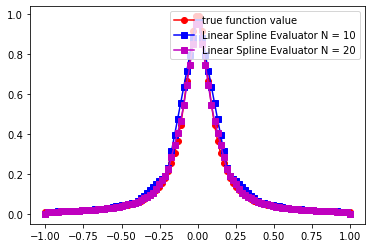

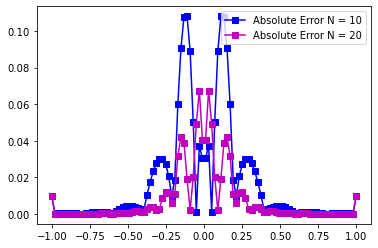

In [15]:
def driver():
    f = lambda x: 1/(1+(10*x)**2)
    a = -1
    b = 1
    
    #’’’ create points you want to evaluate at’’’
    Neval = 100
    xeval = np.linspace(a,b,Neval)
    
    #’’’ number of intervals’’’
    Nint = 10
    Nint2 = 20
    
    #’’’evaluate the linear spline’’’
    yeval = eval_lin_spline(xeval,Neval,a,b,f,Nint)
    yeval2 = eval_lin_spline(xeval,Neval,a,b,f,Nint2)
    
    #’’’ evaluate f at the evaluation points’’’
    fex = np.zeros(Neval)
    
    for j in range(Neval):
        fex[j] = f(xeval[j])
        
    plt.figure()
    plt.plot(xeval,fex,'ro-', label = 'true function value')
    plt.plot(xeval,yeval,'bs-', label = 'Linear Spline Evaluator N = 10')
    plt.plot(xeval,yeval2,'ms-', label = 'Linear Spline Evaluator N = 20')
    plt.legend()
    plt.show
    
    err = abs(yeval-fex)
    err2 = abs(yeval2-fex)
    plt.figure()
    plt.plot(xeval,err,'bs-', label = 'Absolute Error N = 10')
    plt.plot(xeval,err2,'ms-', label = 'Absolute Error N = 20')
    plt.legend()
    plt.show
driver()

The linear spline evaluator performs better for higher N, which is expected since it approximates over a high quantity of smaller intervals, which allows us to get a more accurate function approximation. This method performs far better than global interpolation with uniform nodes used in lab 7, also expected for the same reasoning. 

## 3.3 Cubic Splines

### 1. and 2.

In [6]:
def getcoefs(xint, yint):
    N = len(xint)
    
    G = np.full((N,N), 1/12)
    G[np.diag_indices_from(G)] = 1/3
    G = np.triu(G,-1)
    G = np.tril(G,1)
    
    y = np.empty(N)
    # for i in range(2,N):
    #     y[i-2] = (yint[i] - 2*yint[i-1] + yint[i-2])/(2*(xint[i-1] - xint[i-2])**2)
    
    for i in range(1,N-1):
         y[i] = (yint[i+1] - 2*yint[i] + yint[i-1])/(2*(xint[i+1] - xint[i])**2)
    
    ginv = la.inv(G)
    M = ginv.dot(y)
    
    return M

### 3.

In [7]:
def makecube(xstar, x0, x1, f0, f1, m0, m1):
    h = x1 - x0
    C = (f0/h) - (h*m0)/6
    D = (f1/h) - (h*m1)/6
    
    f = lambda x: (((x1 - x)**3)*m0)/(6*h) + (((x - x0)**3)*m1)/(6*h) + C*(x1 - x) + D*(x - x0)
    
    return f(xstar)

### 4.

In [8]:
def eval_cube_spline(xeval,Neval,a,b,f,Nint):
    #’’’create the intervals for piecewise approximations’’’
    xint = np.linspace(a,b,Nint+1)
    yint = np.zeros(Nint+1)
    
    for j in range(Nint):
        yint[j] = f(xint[j])
        
    #’’’create vector to store the evaluation of the linear splines’’’
    yeval = np.zeros(Neval)
    
    #get coefficients for cubic
    M = getcoefs(xint,yint)
    
    for jint in range(Nint):
        #’’’find indices of xeval in interval (xint(jint),xint(jint+1))’’’
        #’’’let ind denote the indices in the intervals’’’
        ind = np.where(np.logical_and(xint[jint] < xeval,  xeval < xint[jint+1]))
        
        #’’’let n denote the length of ind’’’
        n = len(ind)
        
        #’’’temporarily store your info for creating a cubic in the interval of interest’’’
        a1= xint[jint]
        fa1 = f(a1)
        b1 = xint[jint+1]
        fb1 = f(b1)
        m0 = M[jint]
        m1 = M[jint+1]
                
        for kk in range(n):
            #’’’use your line evaluator to evaluate the lines at each of the points in the interval’’’
            
            #’’’yeval(ind(kk)) = call your line evaluator at xeval(ind(kk)) with the points (a1,fa1) and (b1,fb1)’’’
            
            yeval[ind[kk]] = makecube(xeval[ind[kk]], a1, b1, fa1, fb1, m0, m1)
            
    return yeval

## 3.4 Evaluate

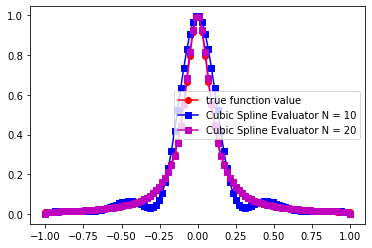

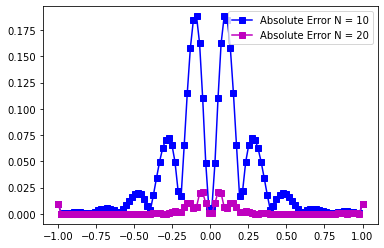

In [14]:
def driver():
    f = lambda x: 1/(1+(10*x)**2)
    a = -1
    b = 1
    
    #’’’ create points you want to evaluate at’’’
    Neval = 100
    xeval = np.linspace(a,b,Neval)
    
    #’’’ number of intervals’’’
    Nint = 10
    Nint2 = 20
    
    #’’’evaluate the linear spline’’’
    yeval = eval_cube_spline(xeval,Neval,a,b,f,Nint)
    yeval2 = eval_cube_spline(xeval,Neval,a,b,f,Nint2)
    
    #’’’ evaluate f at the evaluation points’’’
    fex = np.zeros(Neval)
    
    for j in range(Neval):
        fex[j] = f(xeval[j])
        
    plt.figure()
    plt.plot(xeval,fex,'ro-', label = 'true function value')
    plt.plot(xeval,yeval,'bs-', label = 'Cubic Spline Evaluator N = 10')
    plt.plot(xeval,yeval2,'ms-', label = 'Cubic Spline Evaluator N = 20')
    plt.legend()
    plt.show
    
    err = abs(yeval-fex)
    err2 = abs(yeval2-fex)
    plt.figure()
    plt.plot(xeval,err,'bs-', label = 'Absolute Error N = 10')
    plt.plot(xeval,err2,'ms-', label = 'Absolute Error N = 20')
    plt.legend()
    plt.show
driver()

With the cubic spline evaluator, the function is also well approximated. We see that for N = 10, the absolute error is slightly higher then the linear version, but once more intervals are used as see dratrically lower error (0.02 vs 0.07). This is expected since the approximation wihtin each interval is more advanced. This method performs better than all methods used in lab 7, even when the interpolation nodes were adjusted.